# 상관 분석

## # 01. 작업 준비

#### 패키지 가져오기

In [16]:
import numpy as np
from pandas import read_excel
from scipy import stats

import sys
import seaborn as sb
from matplotlib import pyplot as plt

#### 데이터 가져오기

In [17]:
df = read_excel("https://data.hossam.kr/E03/point.xlsx")
df

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409
5,449,490
6,391,448


## # 02. 탐색적 데이터 분석

#### 산점도 그래프를 통한 상관정도 확인

In [18]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

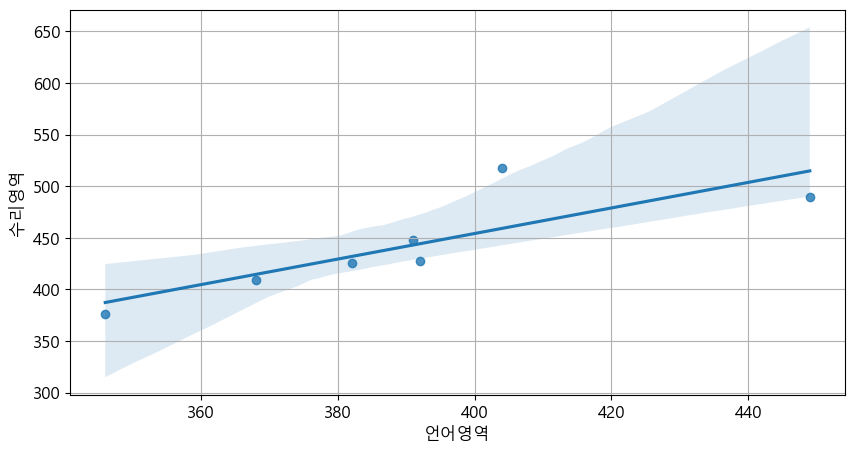

In [19]:
# sb.scatterplot(data = df , x = '언어영역', y = '수리영역')

sb.regplot(data = df, x = '언어영역', y = '수리영역')

plt.grid()
plt.show()
plt.close()

## # 03. 공분산

  - 공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계가 있다.

  - 결과값이 양수면 정비례, 음수면 반비례

    * 잘 쓰이지 않는다

In [20]:
np.cov(df['언어영역'], df['수리영역'])[0, 1]

1271.9523809523807

## # 04. 상관 분석

### numpy를 통한 상관계수 구하기

  - 'p-value' 는 알 수 없기 때문에 분석 결과를 검정할 수 없다.

  - 기본적으로 상관행렬을 표시한다.

In [21]:
np.corrcoef(df['언어영역'], df['수리영역'])

array([[1.        , 0.82106421],
       [0.82106421, 1.        ]])

상관계수를 얻기 위해서는 '0, 1' 혹은 '1, 0' 번째 항목을 취한다.

In [22]:
np.corrcoef(df['언어영역'], df['수리영역'])[0, 1]

0.821064207442306

#### 피어슨 상관계수와 'p-value' 구하기

In [23]:
r, p = stats.pearsonr(df['언어영역'], df['수리영역'])
"상관 계수 : %f, p-value : %f" % (r, p)

'상관 계수 : 0.821064, p-value : 0.023564'

#### 결과 해석
p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 그러므로 언어영역 점수와 수리영역 점수는 상관이 있다.

#### 데이터프레임 객체를 통한 상관계수 구하기

  - numpy를 통해 구한 결과와 동일하다.

  - 이와 같이 표시되는 형태를 상관 행렬이라고 한다.

In [25]:
corr = df.corr(method = 'pearson')
corr

,언어영역,수리영역
언어영역,1.000000,0.821064
수리영역,0.821064,1.000000


#### 상관 분석 결과 시각화

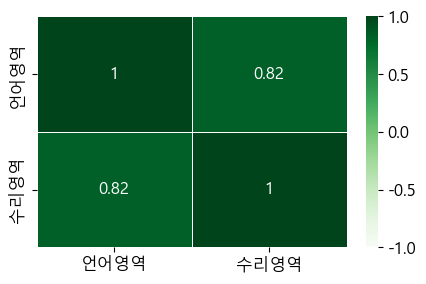

In [27]:
plt.rcParams['figure.figsize'] = (5,3)

sb.heatmap(corr,
           annot = True, # 실제 값 화면에 나타내기
           cmap = 'Greens', # 색상
           vmin = -1, vmax = 1, # 컬러차트 영역 -1 ~ +1
           linewidths = .5 # 구분선
           )

plt.show()
plt.close()

## 예제 (2) - mtcars 데이터를 통한 실린더수와 연비의 상관관계 분석

R 패키지인 ggplot2에 내장된 샘플 데이터로 자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

| 필드 | 설명 |
|---|---|
| mpg | 연료 효율성 (마일 당 갤런) |
| cyl | 실린더 수 |
| disp | 배기량 (cubic inches) |
| hp | 마력 (horsepower) |
| drat | 후륜축 비율 (rear axle ratio) |
| wt | 차량 무게 (1000 파운드) |
| qsec | 1/4 마일 달성 시간 (초) |
| vs | V/S (V 엔진 형태인지, S는 직렬 엔진 형태인지를 나타냄) |
| am | 변속기 형태 (0: 자동, 1: 수동) |
| gear | 전진 기어 수 (전송 기어) |
| carb | 기화기 개수 (carburetors) |

### 데이터 가져오기

In [28]:
df = read_excel("https://data.hossam.kr/E03/mtcars.xlsx", index_col='name')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### 실린더수에 따른 연비에 대한 산점도 그래프

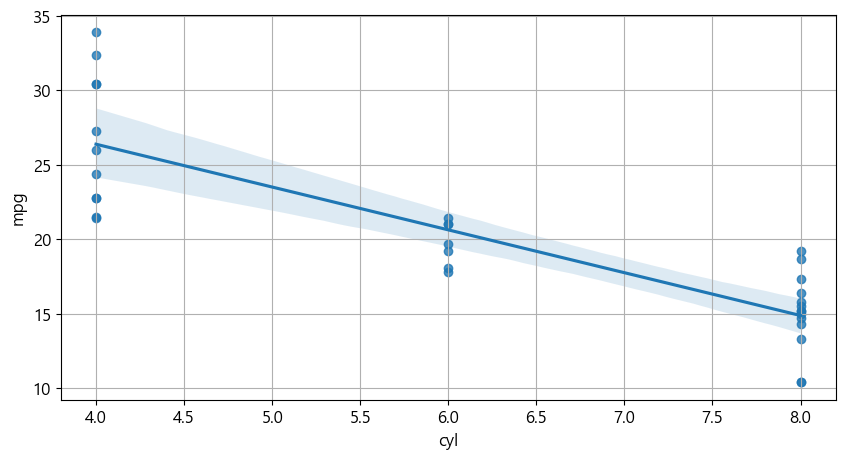

In [29]:
plt.rcParams["figure.figsize"] = (10, 5)

sb.regplot(data=df, x='cyl', y='mpg')
plt.grid()
plt.show()
plt.close()

실린더 수가 증가함에 따라 연비가 낮아지는 경향이 있는것으로 보임

### 상관분석

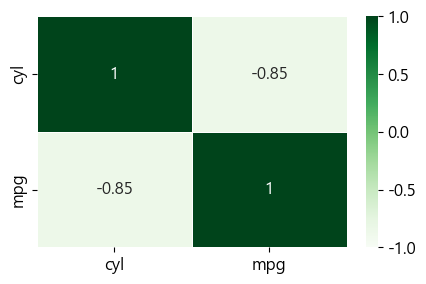

In [30]:
plt.rcParams["figure.figsize"] = (5,3)

corr = df.filter(['cyl', 'mpg']).corr(method='pearson')

sb.heatmap(corr,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()

분석결과 상관계수가 `-0.85`로 나타나 실린더수와 연비는 강한 음의 상관관계가 있는 것으로 나타남

### 분석결과 검정

In [31]:
stats.pearsonr(df['cyl'], df['mpg'])

PearsonRResult(statistic=-0.8521619594266132, pvalue=6.112687142580964e-10)

### 결과보고

32종의 자동차를 대상으로 실린더수에 따른 연비를 조사한 결과 실린더 수와 연비는 강한 음의 상관관계를 갖는 것으로 타나났다. `p-value`가 유의수준 0.05보다 작으므로 이는 통계적으로 유의하다.